In [1]:
# https://www.kaggle.com/vibeeshk/amazon-employees-access-prediction

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [7]:
traindata = pd.read_csv('datasets/amzn_train.csv')
# train.head()

testdata = pd.read_csv('datasets/amzn_test.csv')
# test.head()

In [8]:
traindata.head()

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325

In [9]:
testdata.head()

id  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0   1     78766   72734         118079         118080         117878   
1   2     40644    4378         117961         118327         118507   
2   3     75443    2395         117961         118300         119488   
3   4     43219   19986         117961         118225         118403   
4   5     42093   50015         117961         118343         119598   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117879            118177        19721     117880  
1      118863            122008       118398     118865  
2      118172            301534       249618     118175  
3      120773            136187       118960     120774  
4      118422            300136       118424     118425

<AxesSubplot:>

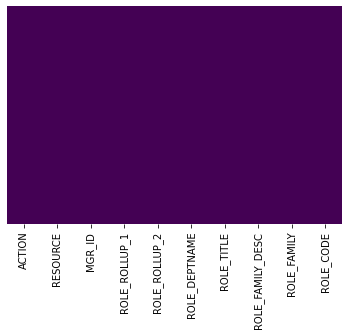

In [11]:
##Thus we see that there are no null values
sns.heatmap(traindata.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='ACTION', ylabel='count'>

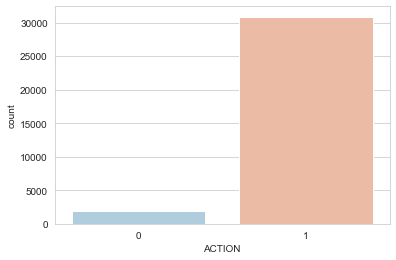

In [12]:
#Now we plot the number of people who were granted access 
sns.set_style('whitegrid')
sns.countplot(x='ACTION',data=traindata,palette='RdBu_r')


In [13]:
y=traindata['ACTION']
x=traindata.drop('ACTION',axis=1)
#Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70,test_size=0.30, random_state=0)

In [14]:
#Logistic Regression
LogisticRegressor = LogisticRegression(max_iter=10000)
LogisticRegressor.fit(x_train, y_train)
y_predicted = LogisticRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print('f1 score:')
print(f1_score(y_test,y_predicted))
print('accuracy score:')
print(accuracy_score(y_test,y_predicted))

Mean Squared Error: 0.05675923100396704
R score: -0.06017470074409559
Mean Absolute Error: 0.05675923100396704
f1 score:
0.9707914572864321
accuracy score:
0.9432407689960329


In [15]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train,y_train);
y_predicted_r = rf.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_r)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print('f1 score:')
print(f1_score(y_test,y_predicted_r))
print('accuracy score:')
print(accuracy_score(y_test,y_predicted_r))

Mean Squared Error: 0.05197843556098057
R score: 0.02912316831499484
Mean Absolute Error: 0.05197843556098057
f1 score:
0.9727597419905113
accuracy score:
0.9480215644390194


In [16]:
# Decision Tree - CART
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)
y_predicted_d = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_d)
r = r2_score(y_test, y_predicted_d)
mae = mean_absolute_error(y_test,y_predicted_d)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print('f1 score:')
print(f1_score(y_test,y_predicted_d))
print('accuracy score:')
print(accuracy_score(y_test,y_predicted_d))

Mean Squared Error: 0.0729325602685383
R score: -0.362267491816338
Mean Absolute Error: 0.0729325602685383
f1 score:
0.9612117933459561
accuracy score:
0.9270674397314617


In [19]:
#XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(x_train,y_train)
xg_pred = xgboost.predict(x_test)
msee21 = mean_squared_error(y_test, xg_pred)
ra21 = r2_score(y_test, xg_pred)
maee21 = mean_absolute_error(y_test,xg_pred)
print("Mean Squared Error:",msee21)
print("R score:",ra21)
print("Mean Absolute Error:",maee21)
print('f1 score:')
print(f1_score(y_test,xg_pred))
print('accuracy score:')
print(accuracy_score(y_test,xg_pred))

c:\users\durgeshp\documents\all_codes\ds\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean Squared Error: 0.05238531176889431
R score: 0.021523349671668024
Mean Absolute Error: 0.05238531176889431
f1 score:
0.9725815897353991
accuracy score:
0.9476146882311057


In [20]:

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred2 = svclassifier.predict(x_test)

mseew = mean_squared_error(y_test, y_pred2)
ra = r2_score(y_test, y_pred2)
maeew = mean_absolute_error(y_test,y_pred2)
print("Mean Squared Error:",mseew)
print("R score:",ra)
print("Mean Absolute Error:",maeew)

print('f1 score:')
print(f1_score(y_test,y_pred2))
print('accuracy score:')
print(accuracy_score(y_test,y_pred2))

Mean Squared Error: 0.05675923100396704
R score: -0.06017470074409559
Mean Absolute Error: 0.05675923100396704
f1 score:
0.9707914572864321
accuracy score:
0.9432407689960329


In [21]:

gnb = GaussianNB()
y_preed = gnb.fit(x_train, y_train).predict(x_test)

ms = mean_squared_error(y_test, y_preed)
rae = r2_score(y_test, y_preed)
mew = mean_absolute_error(y_test,y_preed)
print("Mean Squared Error:",ms)
print("R score:",rae)
print("Mean Absolute Error:",mew)

print('f1 score:')
print(f1_score(y_test,y_preed))
print('accuracy score:')
print(accuracy_score(y_test,y_preed))

Mean Squared Error: 0.08422337503814464
R score: -0.5731624591686579
Mean Absolute Error: 0.08422337503814464
f1 score:
0.9559058472680797
accuracy score:
0.9157766249618553


In [22]:
#KNN
math.sqrt(len(y_test))
#Therefore n neighbors=99

99.15139938498095

In [23]:
#KNN
classify= KNeighborsClassifier (n_neighbors=99, p =2, metric= 'euclidean')
classify.fit(x_train,y_train)
ypred1=classify.predict(x_test)

msee = mean_squared_error(y_test, ypred1)
r = r2_score(y_test, y_predicted_d)
maee = mean_absolute_error(y_test,ypred1)
print("Mean Squared Error:",msee)
print("R score:",r)
print("Mean Absolute Error:",maee)

print('f1 score:')
print(f1_score(y_test,ypred1))
print('accuracy score:')
print(accuracy_score(y_test,ypred1))

Mean Squared Error: 0.05675923100396704
R score: -0.362267491816338
Mean Absolute Error: 0.05675923100396704
f1 score:
0.9707914572864321
accuracy score:
0.9432407689960329


In [24]:
testdata=testdata.drop('id',axis=1)

In [25]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x,y)
Prediction = rf.predict(testdata)

In [26]:
# predictionlist=Prediction.tolist()
# Passengerid=testdatacopy['id'].tolist() 
# output=pd.DataFrame(list(zip(Passengerid, predictionlist)),
#               columns=['id','Action'])
# output.head()
# output.to_csv('my_submission(AmazonEmployeeAccess).csv', index=False) 